In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import random
import math
import tensorflow as tf
import os
import time


In [2]:
#載入圖片特徵
#於image_feature.ipynb中實作並儲存
train_features = np.load('feature/train_features_lenet.npy', allow_pickle=True)
train_labels = np.load('feature/train_labels.npy', allow_pickle=True)
val_features = np.load('feature/val_features_lenet.npy', allow_pickle=True)
val_labels = np.load('feature/val_labels.npy', allow_pickle=True)
test_features = np.load('feature/test_features_lenet.npy', allow_pickle=True)
test_labels = np.load('feature/test_labels.npy', allow_pickle=True)

In [3]:
def one_hot_encoding(y):
    y=y.astype(int) #將label的0~49轉成數字
    num_classes = 50 #共50個label
    y_onehot = np.zeros((len(y), num_classes))
    y_onehot[np.arange(len(y)), y] = 1 #轉成one hot
    return y_onehot

def union_shuffle(X, y):
    X=X.astype(float) #features的原始讀取到的資料型態是object，轉成float
    index = np.arange(X.shape[0])
    np.random.shuffle(index) #將資料排序打亂
    return X[index], y[index]


In [4]:
# One-hot encode labels
y_train = one_hot_encoding(train_labels)
y_valid = one_hot_encoding(val_labels)
y_test = one_hot_encoding(test_labels)

# Shuffle data
x_train, y_train = union_shuffle(train_features, y_train)
x_val, y_val = union_shuffle(val_features, y_valid)
x_test, y_test = union_shuffle(test_features, y_test)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(y_train[1])

(63325, 32, 32, 1)
(63325, 50)
(450, 32, 32, 1)
(450, 50)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


### Lenet5 

In [6]:
# Define the LeNet-5 model
def lenet5():
    model = tf.keras.Sequential()
    
    # Convolutional layer 1
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Convolutional layer 2
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the previous layer output
    model.add(tf.keras.layers.Flatten())
    
    # Fully connected layers
    model.add(tf.keras.layers.Dense(units=120, activation='relu'))
    model.add(tf.keras.layers.Dense(units=84, activation='relu'))
    
    # Output layer
    model.add(tf.keras.layers.Dense(units=50, activation='softmax')) ##輸出50個label
    
    return model

### chatGPT
- If you are using one-hot encoding for the labels, you should modify the model's loss function and use 'categorical_crossentropy' instead of 'sparse_categorical_crossentropy'. Additionally, you need to ensure that the labels are one-hot encoded before passing them to the fit function.

In [7]:
# Define the LeNet-5 model, loss function and optimizer# Create an instance of the LeNet-5 model
model = lenet5()

# Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  有問題
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [8]:
%%time
# Train the model
# Set batch size
batch_size = 32

# Calculate the number of batches per epoch
num_batches = len(x_train) // batch_size

# Start the timer
dynamic_start_time = time.time()
# Train the model with batched data
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=10,
    validation_data=(x_val, y_val),
    steps_per_epoch=num_batches
)
# Calculate the training time
dynamic_training_time = time.time() - dynamic_start_time
print("Training time: %.2f seconds" % dynamic_training_time)
# history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1978/1978 [==============================] - 18s 6ms/step - loss: 3.5897 - accuracy: 0.0772 - val_loss: 3.4034 - val_accuracy: 0.1000
Epoch 2/10
1978/1978 [==============================] - 13s 6ms/step - loss: 3.3397 - accuracy: 0.1234 - val_loss: 3.2629 - val_accuracy: 0.1400
Epoch 3/10
1978/1978 [==============================] - 13s 6ms/step - loss: 3.2357 - accuracy: 0.1432 - val_loss: 3.2122 - val_accuracy: 0.1556
Epoch 4/10
1978/1978 [==============================] - 13s 6ms/step - loss: 3.1684 - accuracy: 0.1599 - val_loss: 3.2066 - val_accuracy: 0.1489
Epoch 5/10
1978/1978 [==============================] - 13s 6ms/step - loss: 3.1147 - accuracy: 0.1695 - val_loss: 3.1976 - val_accuracy: 0.1689
Epoch 6/10
1978/1978 [==============================] - 13s 6ms/step - loss: 3.0673 - accuracy: 0.1791 - val_loss: 3.1870 - val_accuracy: 0.1489
Epoch 7/10
1978/1978 [==============================] - 13s 6ms/step - loss: 3.0272 - accuracy: 0.1899 - val_loss: 3.1527 - val_ac

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

15/15 [==============================] - 0s 2ms/step - loss: 3.0579 - accuracy: 0.1956
Test loss: 3.05788254737854
Test accuracy: 0.19555555284023285


In [10]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"Validation set loss: {val_loss}")
print(f"Validation set accuracy: {val_accuracy}")

15/15 [==============================] - 0s 2ms/step - loss: 3.2058 - accuracy: 0.1644
Validation set loss: 3.2057905197143555
Validation set accuracy: 0.1644444465637207


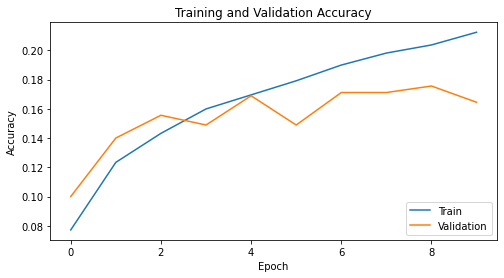

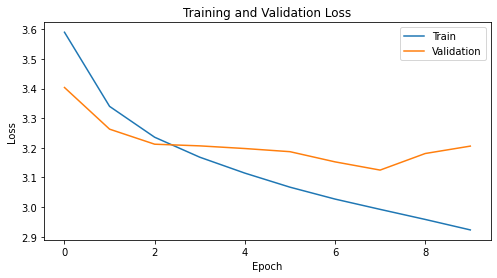

In [11]:
import matplotlib.pyplot as plt


# Plot the training and validation accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('tf_acc.png')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('tf_loss.png')
plt.show()

### Inference time
- 動態圖

In [19]:
import time
# Generate random input tensor for one batch
input_shape = (batch_size, 32, 32, 1)  # Define the input shape
input_tensor = tf.random.normal(input_shape)

# Warm-up the model
_ = model(input_tensor)

# Measure inference time
start_time = time.time()

# Forward pass
output = model(input_tensor)

end_time = time.time()
inference_time = end_time - start_time
print("Dynamic Inference Time for One Batch: %.6f seconds" % inference_time)

Dynamic Inference Time for One Batch: 0.005083 seconds


- 靜態圖

In [18]:
import time
# Generate random input tensor for one batch
input_shape = (batch_size, 32, 32, 1)  # Define the input shape
input_tensor = tf.random.normal(input_shape)

static_model = tf.function(model)

# Warm-up the model
_ = static_model(input_tensor)


# Measure inference time
static_start_time = time.time()

# Forward pass
static_output = static_model(input_tensor)

static_end_time = time.time()
static_inference_time = static_end_time - static_start_time
print("Static Inference Time for One Batch: %.6f seconds" % static_inference_time)

Static Inference Time for One Batch: 0.001622 seconds


### Training time
- 靜態圖
- 動態圖於上方訓練過程中計算

In [14]:
# Create static graph model using tf.function
@tf.function(autograph=True)
def static_graph_model(x, y):
    y_prob = model(x)
    loss = tf.reduce_mean(tf.losses.categorical_crossentropy(y, y_prob))
    return y_prob, loss

# Calculate the training time for static graph
static_start_time = time.time()
static_graph_model(x_train, y_train)
static_training_time = time.time() - static_start_time

print("Static Graph Training Time: %.4f seconds" % static_training_time)

Static Graph Training Time: 1.1024 seconds


### FLOPs、Space complexity
https://pypi.org/project/model-profiler/

In [16]:
from model_profiler import model_profiler
profile = model_profiler(model, batch_size, use_units = ['GPU IDs', 'MFLOPs', 'MB', 'Million', 'MB'])
print(profile)

| Model Profile                    | Value      | Unit    |
|----------------------------------|------------|---------|
| Selected GPUs                    | ['0', '1'] | GPU IDs |
| No. of FLOPs                     | 0.0084     | MFLOPs  |
| GPU Memory Requirement           | 1.1038     | MB      |
| Model Parameters                 | 0.0651     | Million |
| Memory Required by Model Weights | 0.2484     | MB      |


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
